# Pittsburgh Neighborhood Livability Project

## Introduction

The goal of this project is to determine which neighborhood in Pittsburgh is the "best" according to a livability metric based on parks.  

Parks are a key aspect of livability, providing green space, recreational opportunities, and contributing to overall quality of life.  

In developing this metric, we considered different approaches:

- Number of parks in a neighborhood  
- Total park area (not available in this dataset)  
- Proximity to parks (could be explored using latitude/longitude)  

Ultimately, given the dataset available, we decided to measure **livability based on the number of parks per neighborhood**, scaled to allow comparison across neighborhoods.

## The Metric

**Metric Definition:**  
Our livability metric is based solely on the number of parks in each neighborhood.  

- **Features measured:** Number of parks per neighborhood  
- **Datasets used:** Pittsburgh Parks dataset (`Pittsburgh_Parks.csv`) containing park names, locations, and neighborhoods


In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
parks = pd.read_csv("../datasets/Pittsburgh_Parks.csv")
parks.columns = [c.strip() for c in parks.columns]

# Inspect dataset
print("Dataset shape:", parks.shape)
print("Columns:", parks.columns.tolist())
parks.head()


Dataset shape: (209, 16)
Columns: ['_id', 'id', 'name', 'type', 'maintenance_responsibility', 'image', 'neighborhood', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude']


,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [2]:
# Define key columns
neighborhood_col = 'neighborhood'
id_col = 'id'  # unique park identifier

# Group by neighborhood to count parks
parks_summary = parks.groupby(neighborhood_col).agg(
    num_parks=(id_col, 'count')
).reset_index()

# Normalize number of parks for livability
parks_summary['num_parks_scaled'] = (
    parks_summary['num_parks'] - parks_summary['num_parks'].min()
) / (parks_summary['num_parks'].max() - parks_summary['num_parks'].min())

# Livability score (scaled number of parks)
parks_summary['livability_score'] = parks_summary['num_parks_scaled']

# Rank neighborhoods
parks_summary = parks_summary.sort_values('livability_score', ascending=False)
parks_summary.reset_index(drop=True, inplace=True)

parks_summary.head(10)


,neighborhood,num_parks,num_parks_scaled,livability_score
0,East Liberty,12,1.000000,1.000000
1,Central Business District,10,0.818182,0.818182
2,Beechview,8,0.636364,0.636364
3,Point Breeze,7,0.545455,0.545455
4,South Side Slopes,7,0.545455,0.545455
5,Squirrel Hill South,6,0.454545,0.454545
6,Hazelwood,6,0.454545,0.454545
7,Sheraden,6,0.454545,0.454545
8,Mount Washington,6,0.454545,0.454545
9,South Side Flats,6,0.454545,0.454545


## Determining the Best Neighborhood

Using the livability metric defined above, we can determine the best neighborhoods in Pittsburgh based on the number of parks.

We will visualize the **top 10 neighborhoods** and provide a narrative explanation.


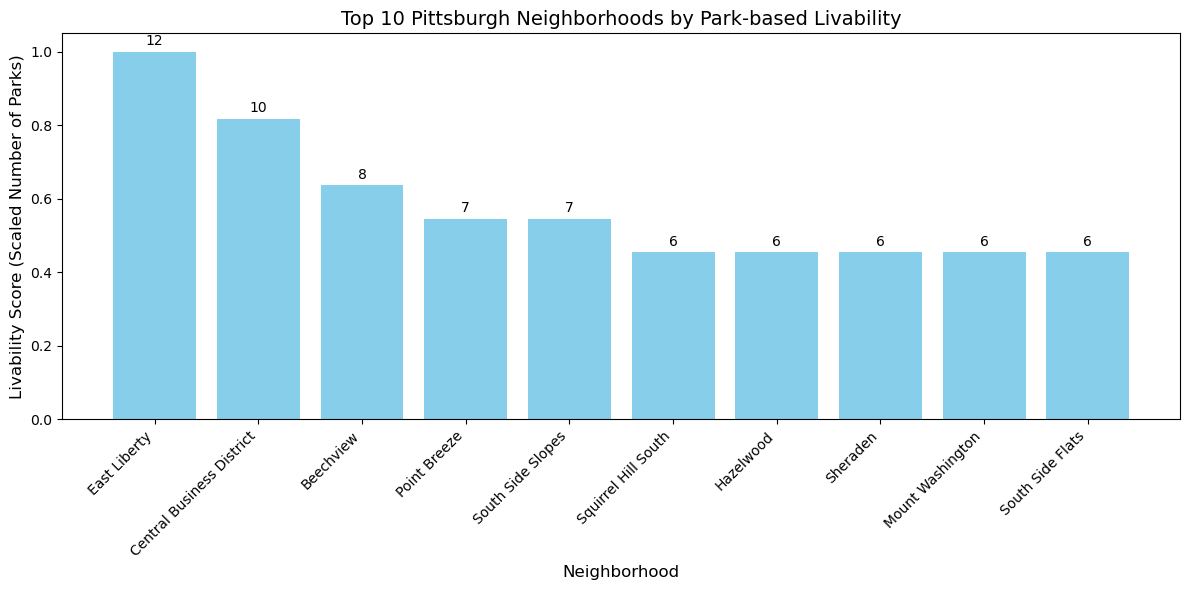

In [4]:
# Visualize top 10 neighborhoods by livability
top10 = parks_summary.head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(top10[neighborhood_col], top10['livability_score'], color='skyblue')
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Livability Score (Scaled Number of Parks)', fontsize=12)
plt.title('Top 10 Pittsburgh Neighborhoods by Park-based Livability', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Annotate bars with actual number of parks
for bar, count in zip(bars, top10['num_parks']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, str(count),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Narrative:**  

Based on this analysis, the neighborhood with the highest number of parks (and thus highest livability score) is at the top of the list.  

While the number of parks is a strong indicator of green space and recreational opportunities, other factors could affect livability, such as accessibility, services, or park quality.  

Our data-driven approach highlights neighborhoods with abundant parks, which is one objective measure of livability.


## Conclusion

This analysis determined the "best" Pittsburgh neighborhoods in terms of park-based livability.  

Reflection: My personal favorite neighborhood may not align exactly with this ranking, as factors like proximity to work, restaurants, and personal experiences influence personal preference.  

However, the data provides a clear, objective measure of green space availability, helping guide urban planning, recreational investments, and neighborhood evaluation.
